In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model definitions

In [2]:
# iteration x class
def get_df(mode, polluted_ratio):
    acc       = pd.read_csv(f"results/mnist/test_{mode}_accuracy_p{polluted_ratio}.csv")
    acc_cls   = pd.read_csv(f"results/mnist/test_{mode}_accuracy_cls_p{polluted_ratio}.csv")
    violation = pd.read_csv(f"results/mnist/test_{mode}_violation_p{polluted_ratio}.csv")
    
    acc["mode"]=mode
    acc["polluted_ratio"]=polluted_ratio
    
    acc_cls["mode"]=mode
    acc_cls["polluted_ratio"]=polluted_ratio
    
    violation["mode"]=mode
    violation["polluted_ratio"]=polluted_ratio
        
    return acc, acc_cls, violation


In [3]:
# class x iteration
def get_df2(mode, polluted_ratio):
    acc       = pd.read_csv(f"results/mnist/test_{mode}_accuracy_p{polluted_ratio}.csv").T
    acc_cls   = pd.read_csv(f"results/mnist/test_{mode}_accuracy_cls_p{polluted_ratio}.csv").T
    violation = pd.read_csv(f"results/mnist/test_{mode}_violation_p{polluted_ratio}.csv").T  
    
    acc["mode"]=mode
    acc["polluted_ratio"]=polluted_ratio
    
    acc_cls["mode"]=mode
    acc_cls["polluted_ratio"]=polluted_ratio
    
    violation["mode"]=mode
    violation["polluted_ratio"]=polluted_ratio
    
    if mode == "baseline" or mode == "ideal":
        for iter in range(1,10):
            acc[iter] = acc[0]
            acc_cls[iter] = acc_cls[0]
            violation[iter] = violation[0]
        
    return acc.iloc[1:,:].reset_index(), acc_cls.iloc[1:,:].reset_index(), violation.iloc[1:,:].reset_index()

# t1,t2,t3 = get_df2("lb",0.3)
# t2

In [83]:
modes=['baseline','ideal','lb','lb_wrong','fair']
polluted_ratio = 0.3

accs       = pd.DataFrame()
accs_cls   = pd.DataFrame()
violations = pd.DataFrame()

accs_T       = pd.DataFrame()
accs_cls_T   = pd.DataFrame()
violations_T = pd.DataFrame()

for mode in modes :
    
    acc, acc_cls, violation = get_df(mode,polluted_ratio)

    accs       = accs.append(acc)
    accs_cls   = accs_cls.append(acc_cls)
    violations = violations.append(violation)
    
    acc, acc_cls, violation = get_df2(mode,polluted_ratio)

    accs_T       = accs_T.append(acc)
    accs_cls_T   = accs_cls_T.append(acc_cls)
    violations_T = violations_T.append(violation)
    
accs       = accs.rename(columns={'Unnamed: 0': 'Iteration', '0':'Accuracy'})
accs_cls   = accs_cls.rename(columns={'Unnamed: 0': 'Iteration'})
violations = violations.rename(columns={'Unnamed: 0': 'Iteration'})

accs_cls['Average'] = accs_cls.iloc[:,1:11].mean(axis=1)
violations['Average'] = violations.iloc[:,1:11].mean(axis=1)

accs_T       = accs_T.rename(columns={'index': 'Class'})
accs_cls_T   = accs_cls_T.rename(columns={'index': 'Class'})
violations_T = violations_T.rename(columns={'index': 'Class'})

In [5]:
# accs_cls_T

In [74]:
def plot_with_lb_wrong(dat):
    fig = plt.figure()
    
    #lb, fair_naive, fair
    ax = sns.lineplot(data=dat[dat["mode"].isin(["lb","fair", "lb_wrong"])],x='Iteration', y='Accuracy',hue='mode')
    
    #baseline
    baseline = dat[dat["mode"].isin(["baseline"])]['Accuracy'].values[0]
    plt.axhline(y=baseline, c="y", linestyle="dashed", label="Baseline")
    
    #ideal
    ideal = dat[dat["mode"].isin(["ideal"])]['Accuracy'].values[0]
    plt.axhline(y=ideal,c="r",linestyle="dashed", label="Ideal")

    labels = ["Label Bias", "Label Bias (wrong prior)", "FAIR", "Unconstrained", "Ideal"]
    handles, _ = ax.get_legend_handles_labels()
    
    print(_)
    plt.legend(handles = handles[1:], labels = labels)
    plt.suptitle('Overall Accuracy')
    
    plt.savefig('figs/accs.png')

['mode', 'lb', 'lb_wrong', 'fair', 'Baseline', 'Ideal']


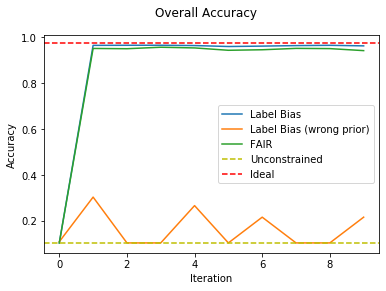

In [75]:
plot_with_lb_wrong(accs)

In [44]:
def plot1(dat):
    fig = plt.figure()
    
    #lb, fair_naive, fair
    ax = sns.lineplot(data=dat[dat["mode"].isin(["lb","fair", "fair_wrong"])],x='Iteration', y='Accuracy',hue='mode')
    
    #baseline
    baseline = dat[dat["mode"].isin(["baseline"])]['Accuracy'].values[0]
    plt.axhline(y=baseline, c="y", linestyle="dashed", label="Baseline")
    
    #ideal
    ideal = dat[dat["mode"].isin(["ideal"])]['Accuracy'].values[0]
    plt.axhline(y=ideal,c="r",linestyle="dashed", label="Ideal")

    labels = ["Label Bias", "FAIR", "Unconstrained", "Ideal"]
    handles, _ = ax.get_legend_handles_labels()
    
    print(_)
    plt.legend(handles = handles[1:], labels = labels)
    plt.suptitle('Overall Accuracy')
    
    plt.savefig('figs/accs.png')

## Accuracy

['mode', 'lb', 'fair', 'Baseline', 'Ideal']


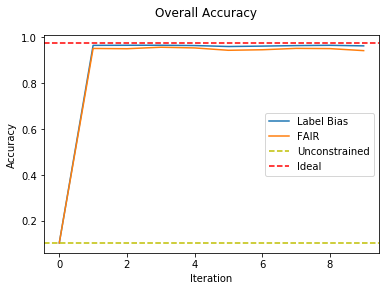

In [45]:
plot1(accs)

In [54]:
# x: iteration
# y: target value
def plot2(dat, class_idx=-1, label="Accuracy"):
    fig = plt.figure()
    
    if class_idx == -1:
        class_idx = "Average"
    else :
        class_idx = str(class_idx)

    #lb, fair_naive, fair
    ax = sns.lineplot(data=dat[dat["mode"].isin(["lb","fair"])], \
                      x='Iteration', \
                      y=class_idx, \
                      hue='mode')

    #baseline
    baseline = dat[dat["mode"].isin(["baseline"])][class_idx].values[0]
    plt.axhline(y=baseline,c="y",linestyle="dashed", label="Baseline")
    
    #ideal
    ideal    = dat[dat["mode"].isin(["ideal"])][class_idx].values[0]
    plt.axhline(y=ideal, c="r", linestyle="dashed", label="Ideal")

    #set legend labels
    labels = ["Label Bias", "FAIR", "Unconstrained", "Ideal"]
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles = handles[1:], labels = labels)
    
    #set y axis labels
    ax.set_ylabel(label)
    plt.suptitle('Distribution Difference (prediction vs ground truth)')

    plt.savefig(F'figs/violation{class_idx}.png')

In [87]:
# x : class
# y : target value
# use "_T" dataframes
def plot3(dat, iteration=8, label="Accuracy"):
    fig = plt.figure()
  
    #lb, fair_naive, fair
    ax = sns.lineplot(data=dat[dat["mode"].isin(["baseline","ideal","lb","lb_wrong","fair",])], \
#     ax = sns.lineplot(data=dat[dat["mode"].isin(["fair"])], \
                      x="Class", \
                      y=iteration, \
                      hue='mode')           
    print(dat[dat["mode"].isin(["baseline","ideal","lb","lb_wrong","fair",])])
    labels = ["Unconstrained","Ideal", "Label Bias", "Label Bias (wrong prior)", "FAIR",]
    handles, _ = ax.get_legend_handles_labels()
  
    ax.set_ylabel(label)

    plt.legend(handles = handles[1:], labels = labels)
    plt.suptitle('Classwise Distribution Difference')
    plt.savefig(F'figs/{label}.png')

# plot3(accs_cls_T)

## Violation

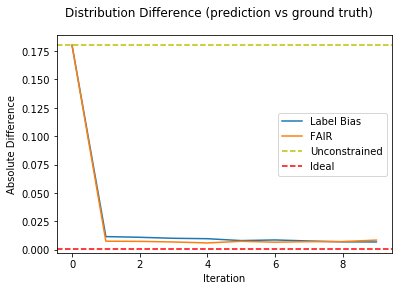

In [51]:
plot2(violations, label="Absolute Difference")

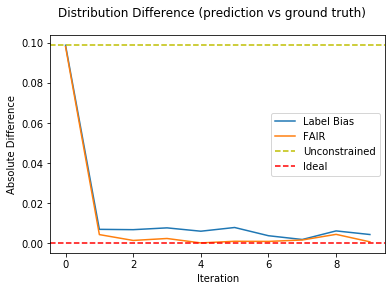

In [53]:
plot2(violations,class_idx=0,label="Absolute Difference")

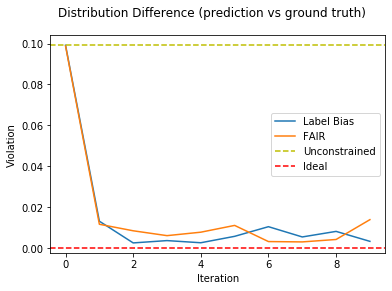

In [84]:
plot2(violations,class_idx=9,label="Violation")

## Per-class accuracy

In [86]:
accs_cls_T

,Class,0,mode,polluted_ratio,1,2,3,4,5,6,7,8,9
0,0,0.000000,baseline,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.000000,baseline,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,1.000000,baseline,0.3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,3,0.000000,baseline,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0.000000,baseline,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,0.000000,baseline,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6,0.000000,baseline,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7,0.000000,baseline,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,8,0.000000,baseline,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,9,0.000000,baseline,0.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


  Class         0      mode  polluted_ratio         1         2         3  \
0     0  0.000000  baseline             0.3  0.000000  0.000000  0.000000   
1     1  0.000000  baseline             0.3  0.000000  0.000000  0.000000   
2     2  1.000000  baseline             0.3  1.000000  1.000000  1.000000   
3     3  0.000000  baseline             0.3  0.000000  0.000000  0.000000   
4     4  0.000000  baseline             0.3  0.000000  0.000000  0.000000   
5     5  0.000000  baseline             0.3  0.000000  0.000000  0.000000   
6     6  0.000000  baseline             0.3  0.000000  0.000000  0.000000   
7     7  0.000000  baseline             0.3  0.000000  0.000000  0.000000   
8     8  0.000000  baseline             0.3  0.000000  0.000000  0.000000   
9     9  0.000000  baseline             0.3  0.000000  0.000000  0.000000   
0     0  0.988775     ideal             0.3  0.988775  0.988775  0.988775   
1     1  0.992952     ideal             0.3  0.992952  0.992952  0.992952   

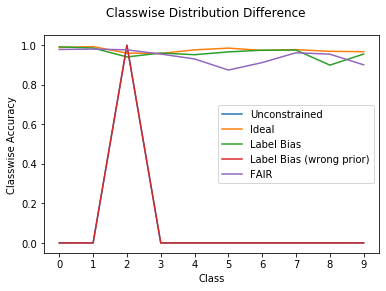

In [88]:
# Per-class accuracy for an iteration
# defualt iteration is 9
plot3(accs_cls_T, iteration=5, label="Classwise Accuracy")

## Per-class Violation

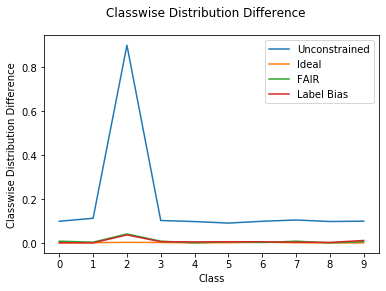

In [61]:
plot3(violations_T, iteration=5, label="Classwise Distribution Difference")